In [4]:
# Title:     SmartHome Dataset
# Authors:   Aline J
# Date:      01/06/2020
# Goal:      Analyze and predict energy use efficiency 
#            in a smarthouse during a year under variable weather conditions.
# Questions: 
# 1) What are the variables that influence energy efficiency? 
# 2) When is 
### Begins Here ####
# 1. Import dependencies
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
import string as string
import warnings
warnings.filterwarnings('ignore')

In [5]:
# 2. Import Raw data file into a data frame
csv_path = "Data/HomeC.csv"
my_data = pd.read_csv(csv_path,   parse_dates=True)
home_dat = my_data.select_dtypes(exclude=['object'])

#df = pd.read_csv(csv_path, delimiter=',')
#df1.dataframeName =df
#nRow, nCol = df.shape
nRow, nCol = my_data.shape
print(f'There are {nRow} rows and {nCol} columns')


There are 503911 rows and 32 columns


In [6]:
time_index = pd.date_range('2016-01-01 05:00', periods=503911,  freq='min')  
time_index = pd.DatetimeIndex(time_index)
home_dat = home_dat.set_index(time_index)
# Check that a dataset has been uploaded into my_data

In [36]:
home_dat.head(5)

,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],...,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
2016-01-01 05:00:00,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,...,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0
2016-01-01 05:01:00,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,0.013117,...,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0
2016-01-01 05:02:00,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,0.013083,...,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0
2016-01-01 05:03:00,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,0.013000,...,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0
2016-01-01 05:04:00,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,0.012783,...,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0


In [37]:
my_data = home_dat[0:-1] ## == dataset[0:dataset.shape[0]-1] == dataset[0:len(dataset)-1] == dataset[:-1]
my_data.tail()

,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],...,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
2016-12-16 03:25:00,1.601233,0.003183,1.601233,0.000050,0.085267,0.642417,0.041783,0.005267,0.008667,0.013483,...,35.12,0.86,8.74,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51
2016-12-16 03:26:00,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,0.013433,...,35.12,0.86,8.74,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51
2016-12-16 03:27:00,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,0.012933,...,35.12,0.86,8.74,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51
2016-12-16 03:28:00,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,0.012817,...,35.12,0.86,8.74,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51
2016-12-16 03:29:00,1.990950,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,0.012833,...,35.12,0.86,8.74,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51


In [38]:
my_data.columns = [col.replace(' [kW]', '') for col in my_data.columns]
my_data.columns

Index(['use', 'gen', 'House overall', 'Dishwasher', 'Furnace 1', 'Furnace 2',
       'Home office', 'Fridge', 'Wine cellar', 'Garage door', 'Kitchen 12',
       'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave', 'Living room',
       'Solar', 'temperature', 'humidity', 'visibility', 'apparentTemperature',
       'pressure', 'windSpeed', 'windBearing', 'precipIntensity', 'dewPoint',
       'precipProbability'],
      dtype='object')

In [39]:
my_data['Furnace'] = my_data[['Furnace 1','Furnace 2']].sum(axis=1)
my_data['Kitchen'] = my_data[['Kitchen 12','Kitchen 14','Kitchen 38']].sum(axis=1)

#df['Result'] = df['Column A']/df['Column B']
my_data.columns
my_data.head(5)

,use,gen,House overall,Dishwasher,Furnace 1,Furnace 2,Home office,Fridge,Wine cellar,Garage door,...,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability,Furnace,Kitchen
2016-01-01 05:00:00,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,...,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0,0.082617,0.000567
2016-01-01 05:01:00,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,0.013117,...,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0,0.084533,0.000567
2016-01-01 05:02:00,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,0.013083,...,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0,0.083017,0.000617
2016-01-01 05:03:00,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,0.013000,...,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0,0.175417,0.000650
2016-01-01 05:04:00,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,0.012783,...,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0,0.300917,0.000783


In [40]:
my_data['EneEffi'] = my_data['gen']/my_data['use']

In [41]:
my_data.head(5)

,use,gen,House overall,Dishwasher,Furnace 1,Furnace 2,Home office,Fridge,Wine cellar,Garage door,...,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability,Furnace,Kitchen,EneEffi
2016-01-01 05:00:00,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,...,29.26,1016.91,9.18,282.0,0.0,24.4,0.0,0.082617,0.000567,0.003734
2016-01-01 05:01:00,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,0.013117,...,29.26,1016.91,9.18,282.0,0.0,24.4,0.0,0.084533,0.000567,0.003710
2016-01-01 05:02:00,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,0.013083,...,29.26,1016.91,9.18,282.0,0.0,24.4,0.0,0.083017,0.000617,0.003720
2016-01-01 05:03:00,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,0.013000,...,29.26,1016.91,9.18,282.0,0.0,24.4,0.0,0.175417,0.000650,0.003408
2016-01-01 05:04:00,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,0.012783,...,29.26,1016.91,9.18,282.0,0.0,24.4,0.0,0.300917,0.000783,0.003043


In [42]:
energy_data = my_data.filter(items=[ 'EneEffi', 'use', 'gen', 'House overall', 'Dishwasher',
                                     'Furnace', 'Home office', 'Fridge',
                                     'Wine cellar', 'Garage door', 'Kitchen',
                                     'Barn', 'Well ', 'Microwave', 'Living room'])
energy_data.head(10)


,EneEffi,use,gen,House overall,Dishwasher,Furnace,Home office,Fridge,Wine cellar,Garage door,Kitchen,Barn,Microwave,Living room
2016-01-01 05:00:00,0.003734,0.932833,0.003483,0.932833,0.000033,0.082617,0.442633,0.124150,0.006983,0.013083,0.000567,0.031350,0.004067,0.001517
2016-01-01 05:01:00,0.003710,0.934333,0.003467,0.934333,0.000000,0.084533,0.444067,0.124000,0.006983,0.013117,0.000567,0.031500,0.004067,0.001650
2016-01-01 05:02:00,0.003720,0.931817,0.003467,0.931817,0.000017,0.083017,0.446067,0.123533,0.006983,0.013083,0.000617,0.031517,0.004067,0.001650
2016-01-01 05:03:00,0.003408,1.022050,0.003483,1.022050,0.000017,0.175417,0.446583,0.123133,0.006983,0.013000,0.000650,0.031500,0.004067,0.001617
2016-01-01 05:04:00,0.003043,1.139400,0.003467,1.139400,0.000133,0.300917,0.446533,0.122850,0.006850,0.012783,0.000783,0.031500,0.004067,0.001583
2016-01-01 05:05:00,0.002467,1.391867,0.003433,1.391867,0.000283,0.566917,0.447033,0.122300,0.006717,0.012433,0.001050,0.031450,0.004067,0.001583
2016-01-01 05:06:00,0.002525,1.366217,0.003450,1.366217,0.000283,0.563117,0.443267,0.122050,0.006733,0.012417,0.001067,0.031550,0.004117,0.001533
2016-01-01 05:07:00,0.002386,1.431900,0.003417,1.431900,0.000250,0.656500,0.444283,0.121800,0.006783,0.012550,0.000933,0.031733,0.004200,0.001550
2016-01-01 05:08:00,0.002100,1.627300,0.003417,1.627300,0.000183,0.813350,0.441467,0.121617,0.006950,0.012717,0.000783,0.031767,0.004200,0.001567
2016-01-01 05:09:00,0.001969,1.735383,0.003417,1.735383,0.000017,0.854050,0.438733,0.121633,0.007233,0.013350,0.000417,0.031667,0.004200,0.001617


In [43]:
weather_data = my_data.filter(items=['Solar', 'temperature', 'humidity', 'visibility',
                               'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
                               'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability'])
#weather_data.head()
weather_data.tail()

,Solar,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
2016-12-16 03:25:00,0.003183,35.12,0.86,8.74,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51
2016-12-16 03:26:00,0.003233,35.12,0.86,8.74,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51
2016-12-16 03:27:00,0.003217,35.12,0.86,8.74,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51
2016-12-16 03:28:00,0.003217,35.12,0.86,8.74,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51
2016-12-16 03:29:00,0.003233,35.12,0.86,8.74,29.45,1011.49,6.72,186.0,0.0101,31.27,0.51


<Figure size 432x288 with 0 Axes>

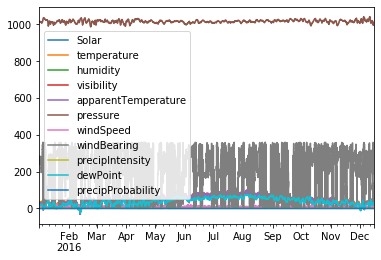

In [44]:
plt.figure();
weather_data.plot();

<Figure size 432x288 with 0 Axes>

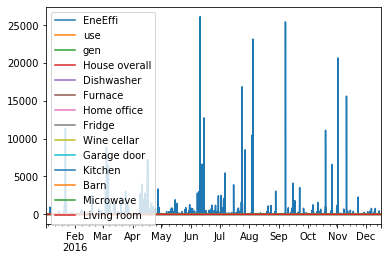

In [45]:
plt.figure();
energy_data.plot();